# **Grupo 14**

Trabalho realizado por:
* Beatriz Fernandes Oliveira A91640
* Catarina Martins Sá Quintas A91650

In [ ]:
!pip install z3-solver

## **Problema**
Neste trabalho, pretende-se construir um autómato híbrido que descreva o funcionamento de um sistema ABS ('Anti-Lock Breaking System'). Assim sendo, este modelo tem que verificar as seguintes propriedades:

1. O autómato utiliza variáveis discretas que correspondem aos diferentes modos, ou seja, que correspondem ao $ Start$, ao $ Free $, ao  $Stopping$, ao $ Blocked $ e ao  $ Stopped $. 

2. Os diferentes modos do autómato correspondem aos diferentes estados de um veículo desde do momento em que está com uma velocidade estável, passando pela travagem, até à sua paragem. Assim sendo, no modo $ Free $, não existe qualquer força de travagem; no modo $ Stopping $, aplica-se a força de travagem alta; no modo $ Blocked $, as rodas estão bloqueadas em relação ao corpo mas o veículo  desloca-se; no modo $ Stopped $, o veículo está imobilizado.

3. O autómato utiliza variáveis contínuas $\,vc,vr\,$ para descrever a $ velocidade$ $ do $  $ corpo $ do veículo em relação ao solo e a $ velocidade$ $ linear $ $ das $  $ rodas $ também em relação ao solo. 

4. Pretende-se que o veículo imobilize-se depressa e não “derrape” muito.

5. Durante a travagem não existe qualquer força no sistema excepto as forças de atrito. Quando uma superfície se desloca em relação à outra, a força de atrito  é proporcional à força de compressão entre elas. 
6. No contacto rodas/solo, o atrito é constante porque a força de compressão corresponde ao peso; tem-se $f = a\cdot P$, sendo  $a$ a constante de atrito e $P$ o peso. Ambos são fixos e independentes do modo.
7. No contacto corpo/rodas,  a força de compressão é a força de travagem que aqui se assume como proporcional à diferença de velocidades  $F =  c\cdot (V-v)$.  A  constante de proporcionalidade $c$ depende do modo: é elevada no modo $Stopping$ e baixa nos outros.
8. Existe um atrito no contacto corpo/ar  que é aproximado por uma constante positiva $\,b$.

9. As equações que traduzem a dinâmica do sistema são, no modo $Blocked$, igual $(V = v) \;\land\; (\,\dot{V}\,=\, -a\cdot P - b\,)$. Já nos restantes modos, a dinâmica do sistema é regida por:
$$\begin{array}{rcl} \dot{V} & = & - c\cdot(V-v) - b\\ \dot{v} & = & -a\cdot P  + c\cdot(V-v) \end{array}$$ 

10. Tanto no modo $Blocked$ como no modo $Free$ existe um timer que impede que se permaneça nestes modos mais do que $\,\tau\,$segundos. Os $\mathsf{jumps}(V,v,t,V',v',t')\,$ com origem nesses modos devem forçar esta condição.

11. No instante inicial assume-se $\,vc = vr\,=\,v\_inicial$.

#**Análise do Problema**
Assim sendo, perante estas propriedades, para a criação do nosso modelo precisamos das seguintes variavéis:

* $ v\_inicial $ - velocidade inicial do veículo;
*  $ vc $ - velocidade do corpo do veículo;
*  $ vr $ - velocidade linear das rodas;
*  $ a $ - constante de atrito;
* $ b $ - atrito entre o corpo e o ar;
* $ c $ - constante de proporcionalidade;
* $ cStopping $ - constante de proporcionalidade no estado Stopping;
* $ P $ - peso do veículo;
* $ t $ - tempo;
* $ timer $ - conta o tempo que permanecemos nos estado Free e Bloocked;
* $ tr\_{max} $ - tempo máximo que pode permanecer no estado Free e Bloocked;
* $ v\_{dif} $ - diferença máxima entre as velocidades;

Relativamente, ao autómato que reflete este problema, depois de uma longa análise do enunciado do mesmo, percebemos que, as transições que irão existir, são: 
* Start -> Free: necessitamos do estado Start para defirnirmos os valores iniciais das variáveis e, como no modo Free, não existem forças de travagem, percebemos que estes dois estados deveriam estar interligados.
* Free -> Stopping para quando a velocidade diminuir, sem travar, e, posteriormente, precisarmos de travar.  
* Free -> Stopped devido à necessidade de tratar dos casos em que, no modo Free, a velocidade, tanto das rodas como do corpo do veículo, encontra-se a zero. 
* Stopping -> Stopped, para tratar os casos em que, no estado Stopping, se chega a uma velocidade de zero.     
* Stopping -> Blocked, para tratar os casos em que o veículo derrapa.
* Blocked -> Stopped, para quando o veículo atinge uma velocidade de zero, das rodas e do corpo. 


#**Autómato Híbrido**





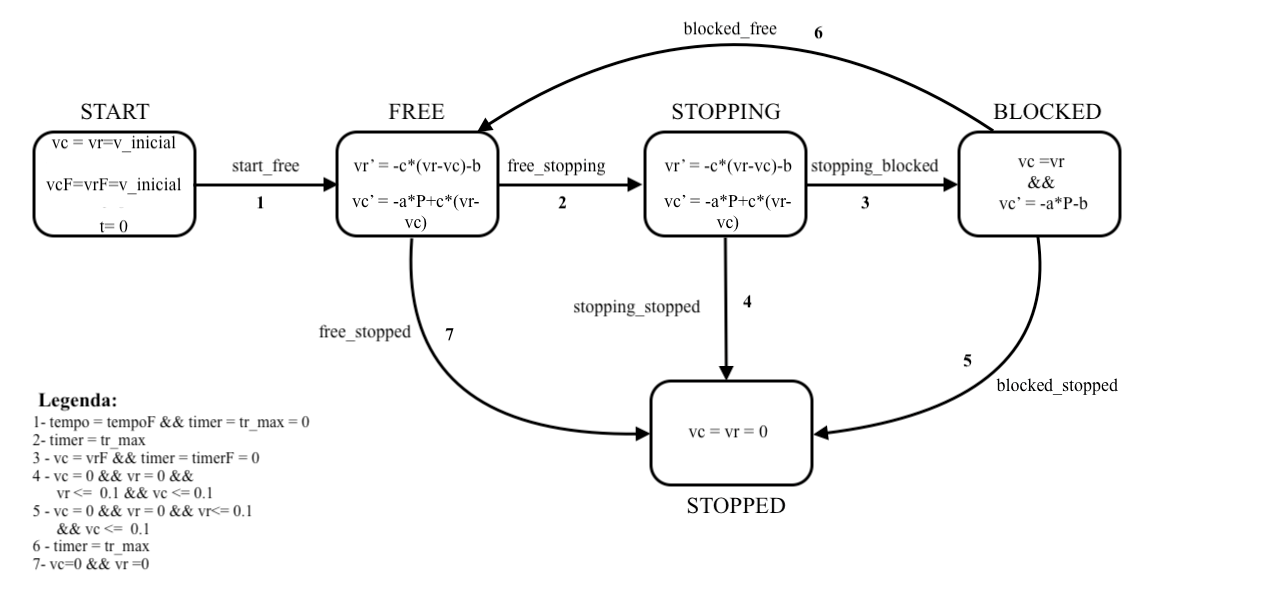

##**Simulação**

Para uma simulação correta e próxima da realidade, criamos a função abaixo com o propósito de observar o gráfico criado pela mesma e para descobrir quais seriam os valores mais realistas das constantes a, b e c.

A constante de atrito, a, tem o valor 0.01.
A constante de atrito corpo/ar, b, tem o valor 1.
A constante de proporcionalidade, c, tem o valor, no estado Stopping, igual a 0.5.



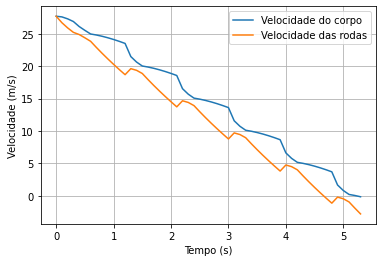

In [ ]:
import matplotlib.pyplot as plt

def constantes_plot(a, b, c, P, time, v_inicial):
    # variaveis de inicializaçao : modo = start 
    vc = v_inicial     # tudo-rodas 
    vr = v_inicial     # rodas
    t = 0              # tempo inicial 
    VC = [vc]          # guardar as != velocidades
    VR = [vr]         
    T = [t]            # guardar os != tempos
    dt = 0.1           # delta t 
    x = 0.3            # tempo max de cada modo
    timer = 0          # tempo de cada modo (vai aumentando)
    # o modo passa para o FREE
    m = "FREE"           
    while(t<time and (vc>=0 or vr>=0 or m=="STOPPED")):
        if timer > x and m== "FREE":
            c = 4
            m = "STOPPING"
            timer = 0
        elif timer > x and m=="STOPPING":
           if vr==0:
             c = 0.5
             m = "STOPPED"
             timer = 0
           else:
             c = 0.5
             m = "BLOCKED"
             timer = 0
        elif timer > x and m=="BLOCKED":
            if (vr!=0 and vc!=0):
              c = 0.5
              m = "FREE"
              timer = 0
            else:
              c = 0.5
              m = "STOPPED"
              timer = 0
              vr= vc   
        timer += dt
        vc,vr  = vc +(-c*(vc-vr)-b)*dt, vr + (-a*P + c *(vc-vr))*dt
        t += dt
        VC.append(vc)
        VR.append(vr)
        T.append(t)
    print("A constante de atrito, a, tem o valor"+' '+str(a)+'.')    
    print("A constante de atrito corpo/ar, b, tem o valor"+' '+str(b)+'.')
    print("A constante de proporcionalidade, c, tem o valor, no estado Stopping, igual a"+' '+str(c)+'.\n')
    plt.plot(T,VC,T,VR)
    plt.legend(['Velocidade do corpo ', 'Velocidade das rodas'], loc=1)
    plt.grid(True)
    plt.ylabel('Velocidade (m/s)')
    plt.xlabel('Tempo (s)')
    #plt.ylim((0,v_inicial + 5))

   
constantes_plot(0.01, 1, 2.25, 1000, 20,27.7 )
            
#   v_ m/S * 3.6 = v_km/h 
#   30 m/s -> 108 km








## **Inicialização**

Tendo definido as constantes pedidas, comecemos a suposta implementação do problema. Para defirmos os diferentes modos existentes, é necessário usar um tipo enumerado do Z3:

In [ ]:
from z3 import *

Mode, (START,FREE,STOPPING,BLOCKED,STOPPED) = EnumSort('Mode', ('START','FREE','STOPPING','BLOCKED','STOPPED'))

Podemos, agora, definir as variáveis do *First-order Transition Systems* (FOTS) e inicializar as mesmas.

In [ ]:
v_inicial = 30
a = 0.01
b = 1
c= 0.5
cStopping = 2.25
P = 1000
tr_max = 0.25
v_dif = 5

def declare(i):
    s = {}
    s['t'] = Real('t'+str(i))
    s['m'] = Const('m'+str(i), Mode)
    s['vc'] = Real('vc'+str(i))
    s['vr'] = Real('vr'+str(i))
    s['timer'] = Real('timer'+str(i)) 
    return s

In [ ]:
def init(s):
  return And(s['t']==0, s['m']==START, s['vc']==v_inicial, s['vr']==v_inicial, s['timer']==0)

#**Transições**

O autómato híbrido tem dois tipos de transições:
* **Transições timed** que correspondem às mudanças ocorrentes dentro de cada modo;
* **Transições untimed** que descrevem as diferentes mudanças entre os diversos modos;

As transições *untimed* são obtidas através da codificação das guardas e dos efeitos especificados nos *switches*. Neste tipo de transições, o tempo não é alterado nem as variáves, a não ser que lhes sejam atribuídas um novo valor nos *switches* .
Relativamente a este problema, as transições *untimed* existentes são:

$$
\begin{array}{c}
m = \mathsf{START} \wedge m' = \mathsf{FREE} \wedge vc' = vc \wedge vr' = vr \wedge t' = t \wedge vc > 0 \wedge timer'=timer \wedge timer'=0 \wedge vc-vc'<=v\_dif \\
\vee\\
m = \mathsf{FREE} \wedge m' = \mathsf{STOPPING} \wedge vc'>vc \wedge vr'>vr \wedge vr'>=0 \wedge vc'>=0 \wedge t' = t \wedge timer'<=timer \wedge    timer'<= tr\_max \wedge timer<=tr\_max \wedge timer = timer' + (t-t') \wedge timer'>=0 \wedge vc'-vc<=v\_dif \\
\vee\\
m = \mathsf{FREE} \wedge m' = \mathsf{STOPPED} \wedge vc = 0 \wedge vr = 0 \wedge vr'<=0.1 \wedge vc'<=0.1 \wedge vr>=0 \wedge vc>=0 \wedge t' = t\\
\vee\\
m = \mathsf{STOPPING} \wedge m' = \mathsf{BLOCKED} \wedge vc' >= vc \wedge vr' >= vr \wedge vc'==vr' \wedge vr>=0 \wedge vc'>=0 \wedge t' = t \wedge vr=0 \wedge timer'=0 \wedge timer>=0 \wedge timer<=tr\_max \wedge vc'-vc<=v\_dif\\
\vee\\
m = \mathsf{STOPPING} \wedge m' = \mathsf{STOPPED} \wedge vc' = vc \wedge vr' >= vr \wedge vr'>=0 \wedge vc'>=0 \wedge t' = t \wedge vc=0 \wedge vr=0 \wedge vc'-vc<=v\_dif \\
\vee\\
m = \mathsf{BLOCKED} \wedge m' = \mathsf{FREE} \wedge vc'= vc \wedge vr' = vr \wedge vc'>vr' \wedge t' = t \wedge timer'<=timer \wedge timer'<=tr\_max \wedge timer<=tr\_max \wedge vr=0 \wedge timer=timer'+(t-t') \wedge timer>=0 \wedge timer'>=0 \wedge (vc'-vc)<=v\_dif \\
\vee\\
m = \mathsf{BLOCKED} \wedge m' = \mathsf{STOPPED} \wedge vc' >= vc \wedge vr'=vr \wedge vc'=0 \wedge vr'=0 \wedge t' = t \wedge timer'<=timer \wedge timer'<=tr\_max \wedge timer <=tr\_max \wedge timer = timer' + (t-t') \wedge timer'>=0 \wedge timer>=0 \wedge vc=0 \wedge vr=0 \wedge vc'-vc <=v\_dif
\end{array}
$$



Nas transições *timed*, apenas altera-se o valor das variáveis que evoluem, de acordo, com as restrições indicadas. 
Assim sendo, as transições *timed* são:

$$
\begin{array}{c}
m = \mathsf{FREE} \wedge m' = m \wedge t'< t \wedge vc'>= vc \wedge vr'>=vr \wedge vc'>=0 \wedge  vr'>=0 \wedge vc'<= V_inicial \wedge t'< t \wedge vr - vr' <= - (-c * 5 + a*P) * (t - t') \wedge (vc - vc'( <= - (c * 5 + b) * (t - t')\wedge timer == timer' + (t - t')\wedge  timer'<= timer  \wedge timer <= tr_max \wedge timer>=0 \wedge timer'>=0, vc'-vc'<= v_dif \\
\vee\\
m = \mathsf{BLOCKED} \wedge m' =m \wedge t' < t \wedge vc'>= vc \wedge vr'>=vr \wedge vc' >= 0 \wedge vr'== 0\wedge vc' <= v_inicial \wedge  vc' >= vr' \wedge vc -vc' == (a*P - b)*(t - t') \wedge t' < t \wedge timer'<=timer \wedge timer<= tr_max, timer == timer' + (t -'t') \wedge timer >=0\\
\vee\\ 
m =\mathsf{STOPPING} \wedge m'=m \wedge vc'>=vc \wedge vr'>=vr \wedge vc>=0 \wedge vr>=0 \wedge vc'>=vr' \wedge t'<t \wedge timer=0 \wedge vr-vr'<= (-(-cSTOPPING*5 + a*P)) * (t-t') \wedge vc-vc'<= (-cSTOPPING*5 + b) * (t-t')\\
\vee\\
m = \mathsf{STOPPED} \wedge m' = m \wedge t'>t \wedge vr=0 \wedge vr'=vr \wedge vc'=vc \wedge vc=0 \wedge vr-vr'<= (-(-c*5 + a*P)) * (t-t') \wedge timer=0 \wedge vc-vc'<= (-c*5 + b) * (t-t')
\end{array}
$$



In [ ]:
def trans(s,p):

  # transições untimed
  start_free = And(s['m']==START, p['m']==FREE, s['vc']==p['vc'], s['vr']==p['vr'], s['t']==p['t'],
                   s['vr']>0, s['vc']>0, s['timer']==p['timer'], s['timer']==0,s['vc']-p['vc']<= v_dif)
  
  free_stopping = And(s['m']==FREE, p['m']==STOPPING, s['vc'] >p['vc'], s['vr']> p['vr'], s['vr']>=0, 
                      s['vc']>=0, s['t']==p['t'], s['timer']<=p['timer'], s['timer']<= tr_max, 
                      p['timer']<= tr_max, p['timer'] == s['timer'] + (p['t'] - s['t']), s['timer']>=0, s['vc']-p['vc']<= v_dif)
  
  free_stopped = And(s['m']==FREE, p['m']==STOPPED, p['vc']==0,p['vr']==0,s['vr'] <= 0.1, s['vc'] <= 0.1, s['vr']>=0, s['vc']>=0, s['t']==p['t'])
  
  stopping_blocked = And(s['m']==STOPPING, p['m']==BLOCKED, s['vc']>=p['vc'], s['vr']>=p['vr'], 
                         s['vc']==s['vr'], s['vr']>=0, s['vc']>=0, s['t']==p['t'],p['vr']==0, s['timer']==0, 
                         p['timer']>=0, p['timer']<= tr_max, s['vc']-p['vc']<= v_dif)
  
  stopping_stopped = And(s['m']==STOPPING, p['m']==STOPPED, s['vc']==p['vc'], s['vr']>=p['vr'], 
                          s['vr']>=0, s['vc']>=0, s['t']==p['t'],p['vc']==0,p['vr']==0,s['vc']-p['vc']<= v_dif)
   
  
  blocked_free = And(s['m']==BLOCKED, p['m']==FREE, s['vc']==p['vc'], s['vr']==p['vr'], s['vc']>s['vr'], 
                     s['t']==p['t'], s['timer']<=p['timer'], s['timer']<= tr_max, p['timer']<= tr_max, 
                     p['timer'] == s['timer'] + (p['t'] - s['t']), p['timer']>=0, s['timer']>=0, s['vc']-p['vc']<= v_dif, p['vr']>0)
  
  blocked_stopped = And(s['m']==BLOCKED, p['m']==STOPPED, s['vc']>=p['vc'], s['vr']==p['vr'], s['vc']==0, s['vr']==0, 
                        s['t']==p['t'], s['timer']<=p['timer'], s['timer']<= tr_max, p['timer']<= tr_max, 
                        p['timer'] == s['timer'] + (p['t'] - s['t']), p['timer']>=0, s['timer']>=0, p['vc'] == 0, 
                        p['vr'] == 0,s['vc']-p['vc']<= v_dif) 

  # transições timed
  freefree = And(s['m']==FREE, p['m']==FREE, s['vc']>= p['vc'], s['vr']>=p['vr'],
                 s['vc'] >=0, s['vr'] >= 0, s['vc'] <= v_inicial, s['t'] < p['t'], 
                 p['vr'] - s['vr'] <= - (-c * 5 + a*P) * (p['t'] - s['t']),
                 p['vc'] - s['vc'] <= - (c * 5 + b) * (p['t'] - s['t']),
                 p['timer'] == s['timer'] + (p['t'] - s['t']), s['timer']<=p['timer'],
                 p['timer']<= tr_max, p['timer']>=0, s['timer']>=0, s['vc']-p['vc']<= v_dif)   
  
  stoppingstopping = And(s['m']==STOPPING, p['m']==STOPPING, s['vc']>= p['vc'], s['vr']>=p['vr'], 
                         p['vc'] >= 0, p['vr'] >=0, s['vc'] > s['vr'], 
                         s['t'] < p['t'], p['timer']==0,
                         p['vr'] - s['vr'] <= - (-cStopping * 5 + a*P) * (p['t'] - s['t']),
                         p['vc'] - s['vc'] <= - (cStopping * 5 + b) * (p['t'] - s['t']), s['vr']-s['vc']>=0.05)  
  
  blockedblocked = And(s['m']==BLOCKED, p['m']==BLOCKED, s['vc']>= p['vc'], s['vr']>=p['vr'], 
                       s['vc'] >= 0, s['vr'] == 0, s['vc'] <= v_inicial , s['vc'] >= s['vr'], 
                       p['vc'] - s['vc'] == (a*P - b)*(p['t'] - s['t']), s['t'] < p['t'],
                       s['timer']<=p['timer'], p['timer']<= tr_max, p['timer'] == s['timer'] + (p['t'] - s['t']),
                       p['timer']>=0)

  stoppedstopped = And(s['m']==STOPPED, p['m']==STOPPED, p['vr']==0, s['vr']==p['vr'], s['vc']==p['vc'], 
                       p['vc'] == 0,
                       p['vr'] - s['vr'] <= - (-c * 5 + a*P) * (p['t'] - s['t']), p['timer']==0,
                       p['vc'] - s['vc'] <= - (c* 5 + b) * (p['t'] - s['t']), s['t'] < p['t'])
  
  return Or(start_free, free_stopping, stopping_blocked, stopping_stopped, blocked_free,blocked_stopped, freefree, stoppingstopping, blockedblocked, stoppedstopped)

In [ ]:
def gera_traco(declare, init, trans, k):
    s = Solver()
    traco = [declare(i) for i in range(k)]
    frac2float = lambda x : float(x.numerator_as_long())/float(x.denominator_as_long())

    s.add(init(traco[0]))
    
    for i in range(k-1):
        s.add(trans(traco[i], traco[i+1]))
    s.add(traco[k-1]['m']==STOPPED)
    
    if s.check() == sat:
        m = s.model()
        for i in range(k):
            print("Estado:", i)
            for v in traco[i]:
                res = m[traco[i][v]]
                if res!=None:
                  if res.sort() != RealSort():
                      print(v, '=', res)
                  else:
                      print(v, '=', frac2float(res))
            print()
        
        T  = [frac2float(m[traco[i]["t"]]) for i in range(k)]
        VC = [frac2float(m[traco[i]["vc"]]) for i in range(k)]
        VR = [frac2float(m[traco[i]["vr"]]) for i in range(k)]
        return T, VC, VR
    else:
        print("Não tem solução.")
                   
T, VC, VR = gera_traco(declare, init, trans,100)

#plt.plot(T, VC, T, VR)
#plt.legend(['Velocidade do corpo ', 'Velocidade das rodas'], loc=1)
#plt.ylabel('Velocidade (m/s)')
#plt.xlabel('Tempo (s)')
#plt.grid(True)


Estado: 0
t = 0.0
m = START
vc = 30.0
vr = 30.0
timer = 0.0

Estado: 1
t = 0.0
m = FREE
vc = 30.0
vr = 30.0
timer = 0.0

Estado: 2
t = 0.0026041666666666665
m = FREE
vc = 25.0
vr = 25.013020833333332
timer = 0.0026041666666666665

Estado: 3
t = 0.005208333333333333
m = FREE
vc = 24.990885416666668
vr = 24.993489583333332
timer = 0.005208333333333333

Estado: 4
t = 0.0078125
m = FREE
vc = 19.990885416666668
vr = 1.8216145833333333
timer = 0.0078125

Estado: 5
t = 0.010416666666666666
m = FREE
vc = 19.981770833333332
vr = 1.8020833333333333
timer = 0.010416666666666666

Estado: 6
t = 0.013020833333333334
m = FREE
vc = 16.7265625
vr = 1.7825520833333333
timer = 0.013020833333333334

Estado: 7
t = 0.015625
m = FREE
vc = 11.7265625
vr = 1.7630208333333333
timer = 0.015625

Estado: 8
t = 0.018229166666666668
m = FREE
vc = 6.7265625
vr = 1.7434895833333333
timer = 0.018229166666666668

Estado: 9
t = 0.020833333333333332
m = FREE
vc = 1.7265625
vr = 1.7239583333333333
timer = 0.020833333333333

# **Exemplo de Execução**

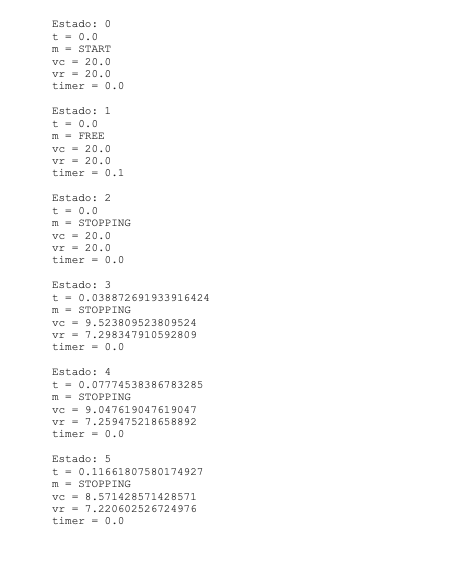

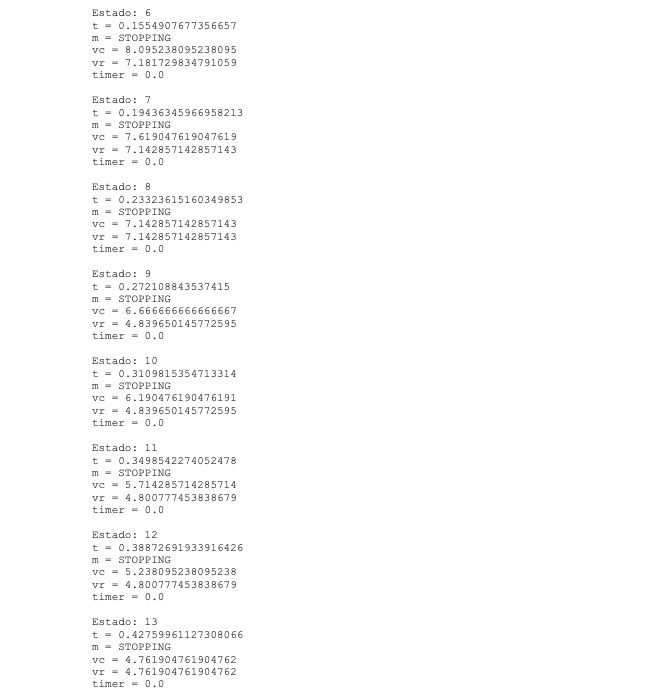

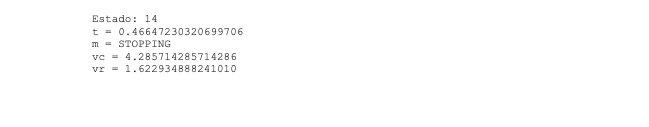

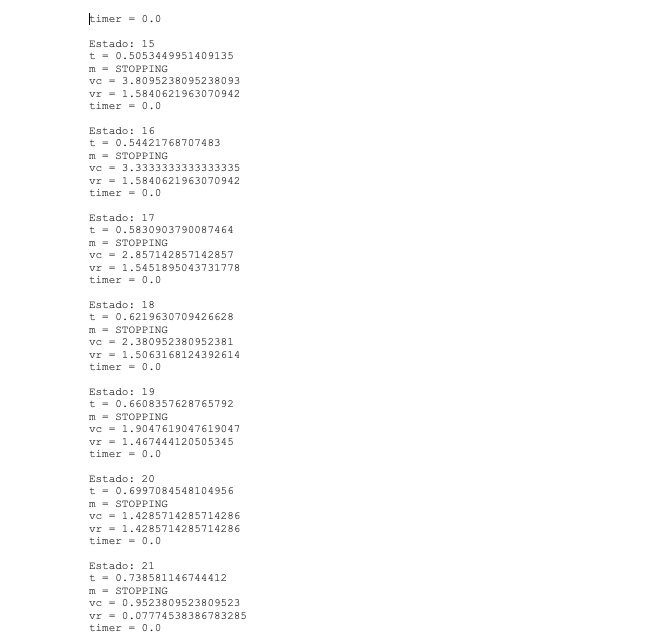

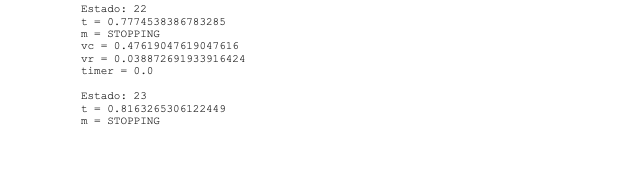

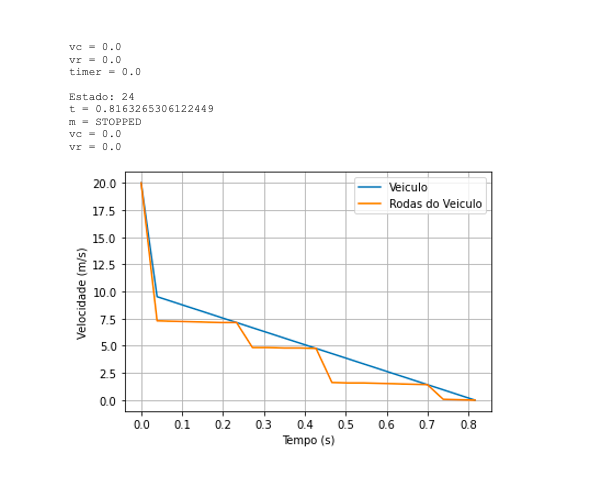

#Lógica Temporal Linear (LTL)
Para além das propriedades definidas acima, o sistema deve, ainda, verificar as seguintes propriedades:

* O veiculo imobiliza-se completamente em menos de $x$ segundos.

$$ x \geq t \rightarrow mode = Stopped \lor (vc \leq 0 \land vr \leq0) $$ 

* A velocidade $V$ diminui sempre ao longo do tempo: 
$$t < t' \rightarrow V > V' $$

Com intuito de verificar-mos se as propriedades anteriores são verificadas, criamos a função abaixo, bmc_always, que nos indica até que tamanho de traco estas estão bem implementadas. 






In [ ]:
def bmc_always(declare,init,trans,propriedade1, propriedade2, K):
   for k in range(1,K+1):
        s = Solver()
        traco = [declare(i) for i in range(k)]
        s.add(init(traco[0]))
        
        for i in range(k-1):
         s.add(trans(traco[i],traco[i+1]))
         s.add((Not(propriedade1(traco[i],traco[i+1]))))
         s.add((Not(propriedade2(traco[i],traco[i+1]))))
        
        s.add(traco[k-1]['t']!=0)
        
        if s.check()==sat:
          print("A propriedade falha")
          m = s.model()
          for i in range(k):
            print("Estado: ",i)
            for v in traco[i]:
              r=m[traco[i][v]]
              if r!=None:
                if r.sort()!=RealSort():
                  print(v,'=',r)
                else:
                  print(v,'=',float(r.numerator_as_long())/float(r.denominator_as_long()))
                  return
   print("A propriedade é válida em traços de tamanho até "+str(K))
   print("As propriedades podem ser verdadeiras")
        
def propriedade1 (s,p):
   return Implies(p['t']>=s['t'], Or(s['m']==STOPPED, And(s['vc']<=0, s['vr']<=0)))

def propriedade2 (s,p):
  return Implies(s['t'] < p['t'], s['vr']>p['vr'])


bmc_always(declare,init,trans,propriedade1,propriedade2,150)

A propriedade é válida em traços de tamanho até 150
As propriedades podem ser verdadeiras
